In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf

In [8]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [35]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [27]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-17,4.469130,4.485188,4.495649,4.397268,4.402498,296555412
2004-12-20,4.591728,4.608227,4.693906,4.529771,4.533009,394854485
2004-12-21,4.560210,4.576596,4.679460,4.567878,4.640357,221479058
2004-12-22,4.623495,4.640108,4.653806,4.558165,4.580332,156865776
2004-12-23,4.663202,4.679958,4.697393,4.632636,4.668750,145125936


In [11]:
google_data.shape

(5034, 6)

In [28]:
 google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,48.211236,48.375809,48.863580,47.871797,48.353583,1.094367e+08
std,46.087913,46.230151,46.707522,45.744605,46.195650,1.423388e+08
min,4.342810,4.358414,4.443345,4.298140,4.366135,1.584340e+05
25%,13.264752,13.312414,13.435951,13.188878,13.330472,2.661215e+07
50%,27.880444,27.980621,28.294975,27.808402,28.049179,5.125068e+07
75%,63.581669,63.810123,64.372034,63.045627,63.703752,1.333801e+08
max,198.779999,198.779999,202.880005,197.410004,198.720001,1.650833e+09


In [13]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-12-17 to 2024-12-17
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5034 non-null   float64
 1   (Close, GOOG)      5034 non-null   float64
 2   (High, GOOG)       5034 non-null   float64
 3   (Low, GOOG)        5034 non-null   float64
 4   (Open, GOOG)       5034 non-null   float64
 5   (Volume, GOOG)     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [29]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

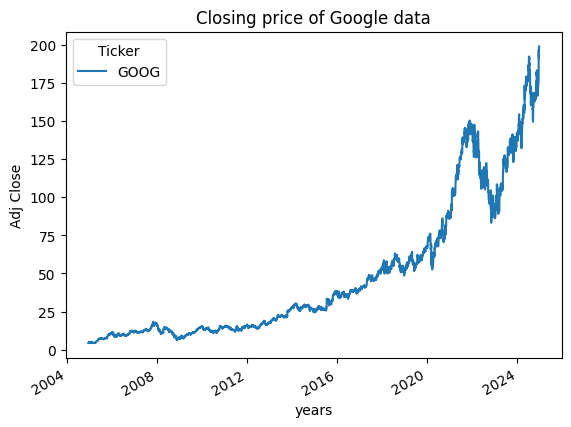

In [31]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [37]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [38]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

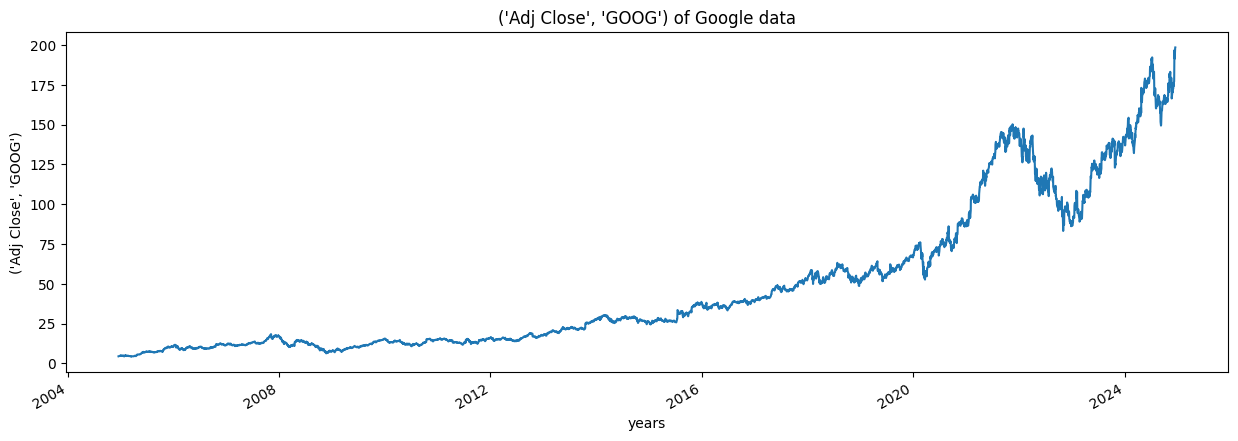

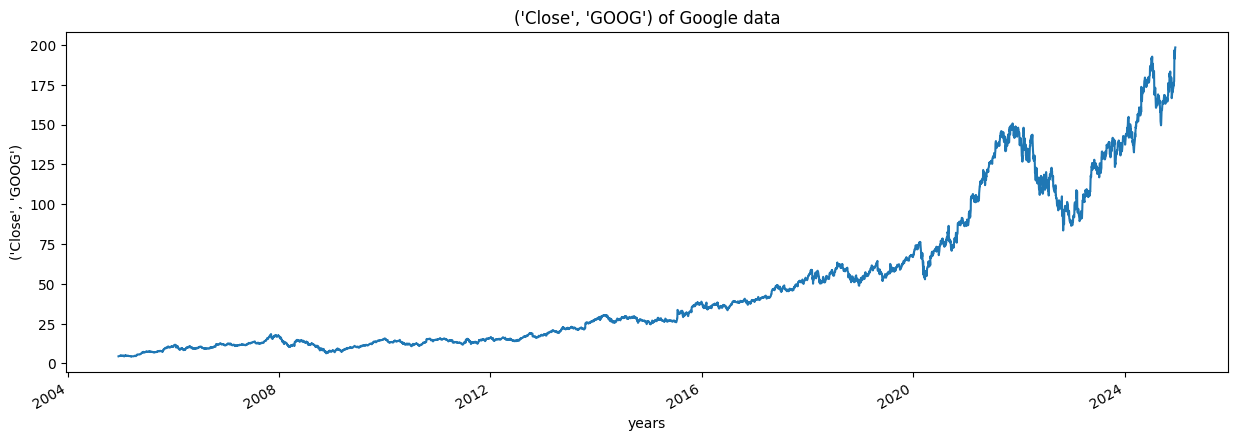

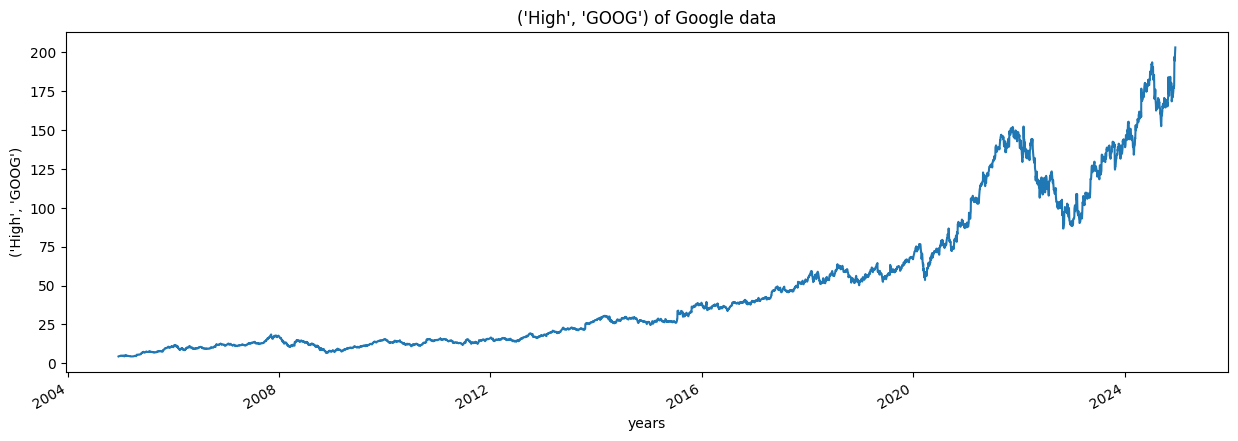

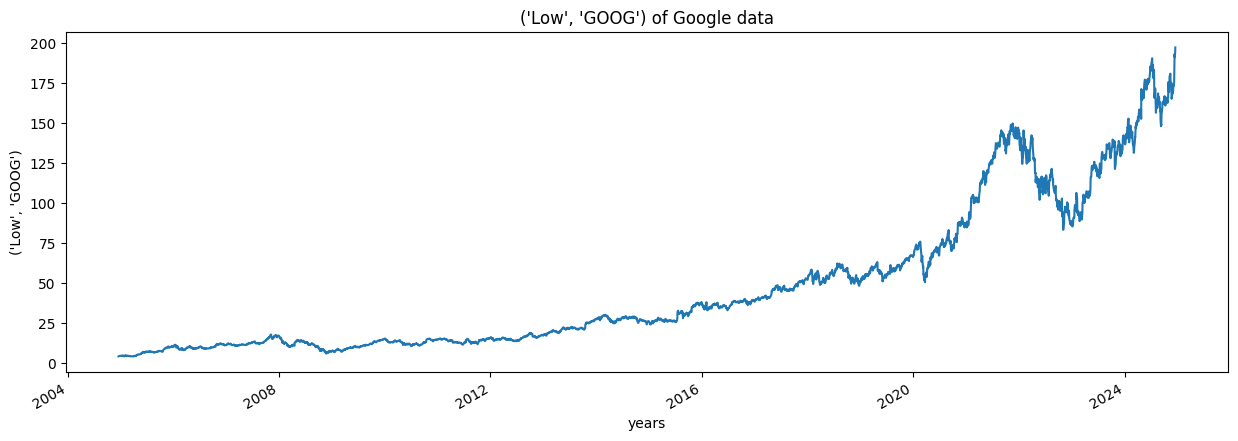

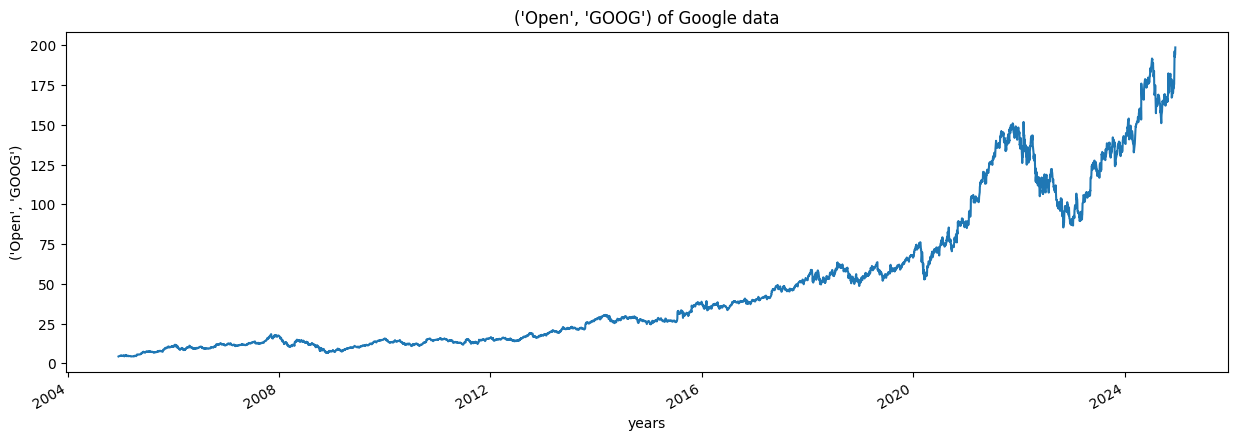

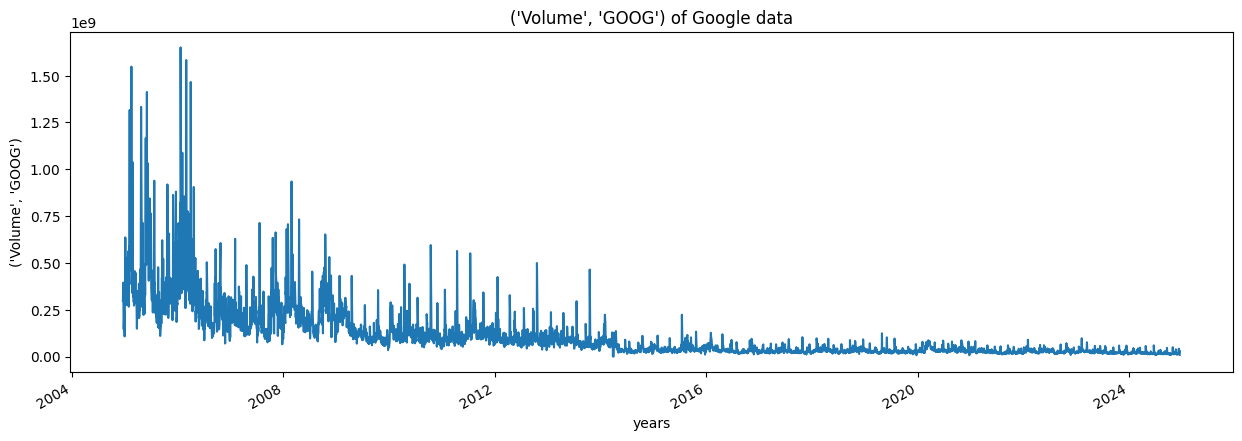

In [39]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [109]:
10, 20, 30, 40, 50, 60, 70, 80, 90, 100

MA for 5 days ==> null null null null 30 40 50 60 70 80

SyntaxError: invalid syntax (4108087205.py, line 3)

In [44]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [45]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [47]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [49]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 10
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 243


In [50]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [52]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-12-07         NaN
2005-12-08         NaN
2005-12-09         NaN
2005-12-12         NaN
2005-12-13    6.629706
Name: MA_for_250_days, dtype: float64

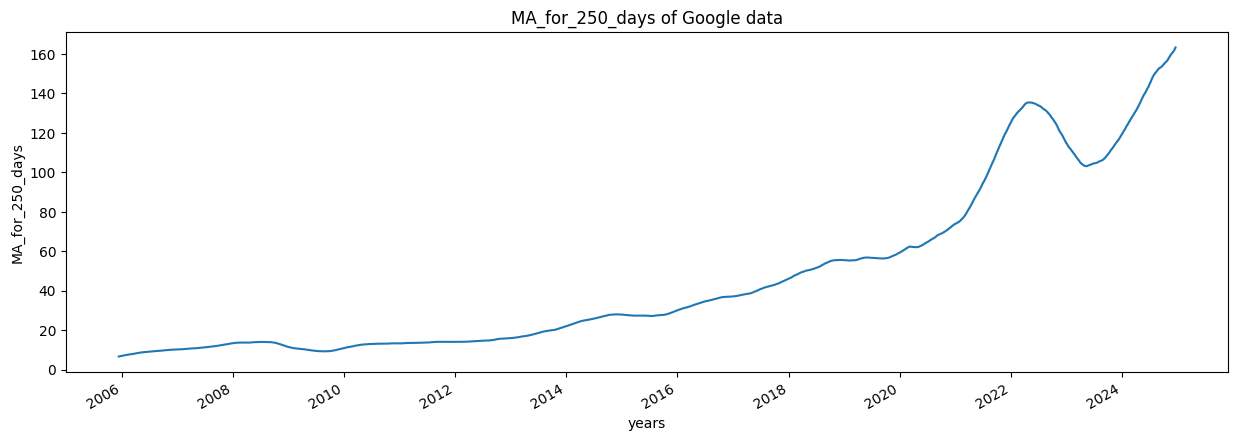

In [53]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

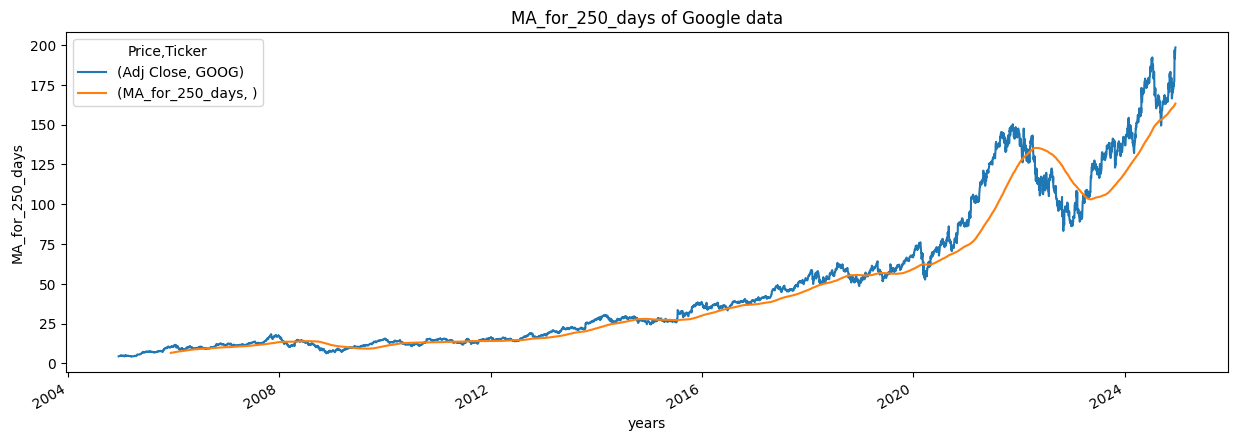

In [54]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

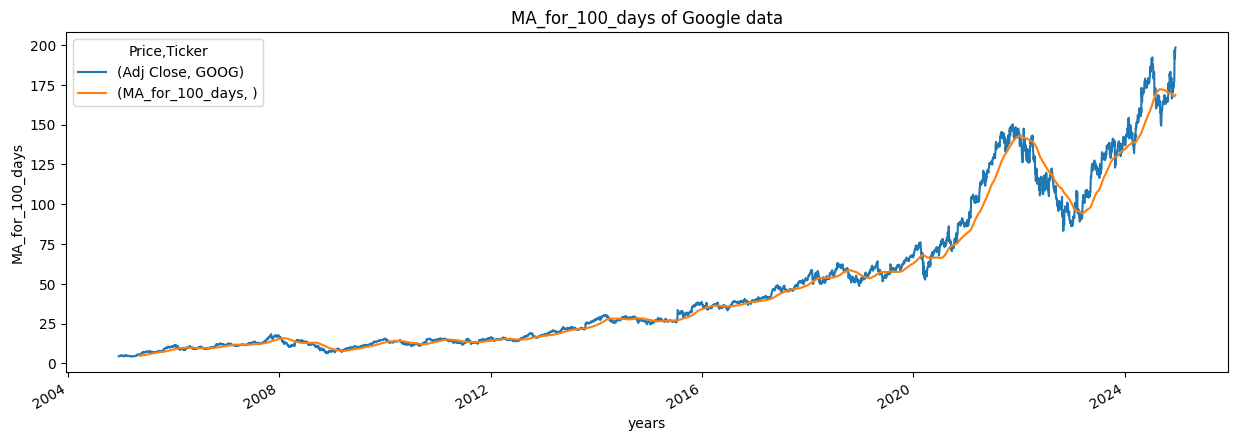

In [56]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

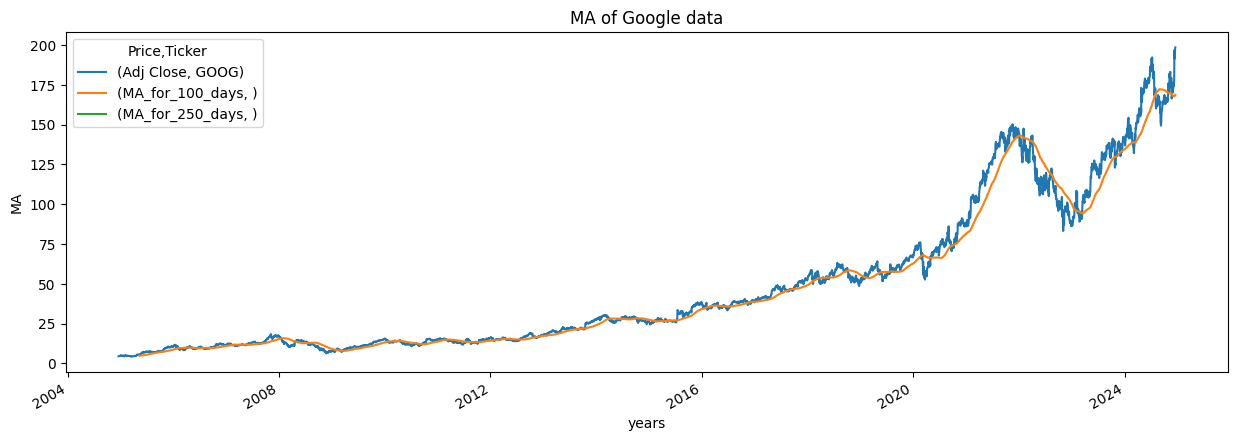

In [63]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days' , 'MA_for_250_days']], 'MA')

In [64]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-17,4.469130,NaN
2004-12-20,4.591728,0.027432
2004-12-21,4.560211,-0.006864
2004-12-22,4.623495,0.013878
2004-12-23,4.663203,0.008588


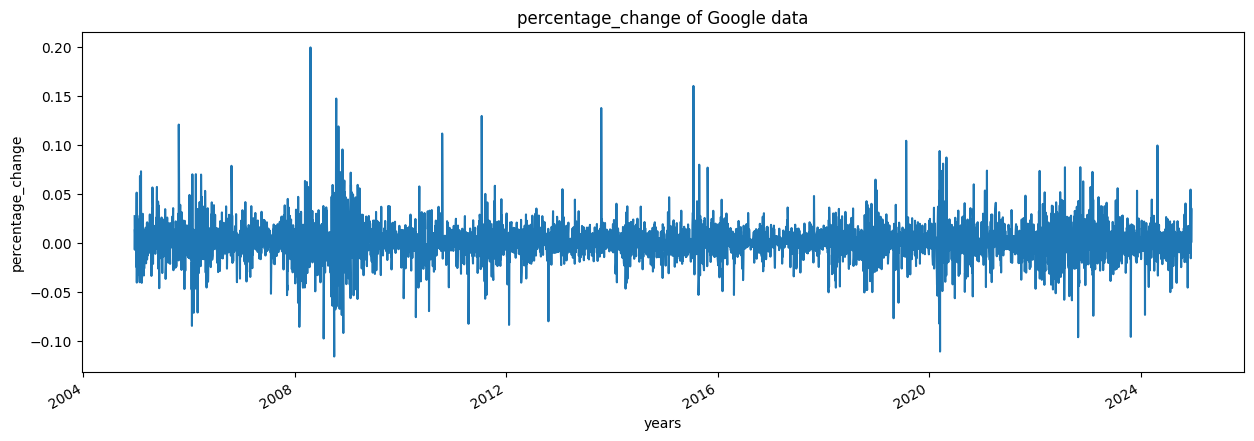

In [65]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [66]:
Adj_close_price = google_data[['Adj Close']]

In [67]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([198.44000244]), array([4.34281015]))

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[6.50804924e-04],
       [1.28244027e-03],
       [1.12006026e-03],
       ...,
       [9.63626483e-01],
       [9.98557430e-01],
       [1.00000000e+00]], shape=(5034, 1))

In [70]:
len(scaled_data)

5034

In [71]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [72]:
x_data[0],y_data[0]

(array([[6.50804924e-04],
        [1.28244027e-03],
        [1.12006026e-03],
        [1.44610514e-03],
        [1.65068132e-03],
        [2.16340537e-03],
        [2.27208945e-03],
        [2.28998892e-03],
        [2.89093526e-03],
        [2.27592681e-03],
        [3.54430743e-03],
        [2.49456509e-03],
        [2.36798400e-03],
        [1.73379369e-03],
        [2.41145763e-03],
        [2.56616786e-03],
        [2.37181889e-03],
        [2.60708162e-03],
        [2.60069176e-03],
        [3.19397077e-03],
        [3.69646024e-03],
        [2.85257892e-03],
        [2.42040491e-03],
        [1.69927224e-03],
        [7.32642271e-04],
        [2.72341584e-04],
        [1.82201598e-03],
        [1.67369807e-03],
        [1.96266164e-03],
        [2.63777308e-03],
        [2.16212789e-03],
        [3.95985209e-03],
        [4.58637261e-03],
        [3.75527837e-03],
        [2.69019153e-03],
        [3.02391358e-03],
        [2.12121413e-03],
        [1.66091098e-03],
        [1.5

In [74]:

int(len(x_data)*0.7)

3453

In [76]:
4908-100-int(len(x_data)*0.7)

1355

In [77]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [88]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [93]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
model.fit(x_train,y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 423s 121ms/step - loss: 2.3977e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 415s 120ms/step - loss: 6.1897e-05


In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [96]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step


In [97]:
predictions

array([[0.26302704],
       [0.26865387],
       [0.27146903],
       ...,
       [0.97049093],
       [0.96258307],
       [0.9712042 ]], shape=(1481, 1), dtype=float32)

In [98]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.395622],
       [ 56.487774],
       [ 57.034187],
       ...,
       [192.71237 ],
       [191.17747 ],
       [192.85081 ]], shape=(1481, 1), dtype=float32)

In [99]:
y_test

array([[0.26417613],
       [0.2627336 ],
       [0.26839341],
       ...,
       [0.96362648],
       [0.99855743],
       [1.        ]], shape=(1481, 1))

In [100]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.61865616],
       [ 55.33866501],
       [ 56.43721771],
       ...,
       [191.38000488],
       [198.16000366],
       [198.44000244]], shape=(1481, 1))

In [101]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [102]:
rmse

np.float64(3.427439726523269)

In [103]:
ploting_data = pd.DataFrame(
 {
     'original_test_data': inv_y_test.reshape(-1),
         'predictions': inv_predictions.reshape(-1)
 },
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-01-31,55.618656,55.395622
2019-02-01,55.338665,56.487774
2019-02-04,56.437218,57.034187
2019-02-05,57.094357,57.705051
2019-02-06,55.561863,58.344326


<Figure size 640x480 with 0 Axes>

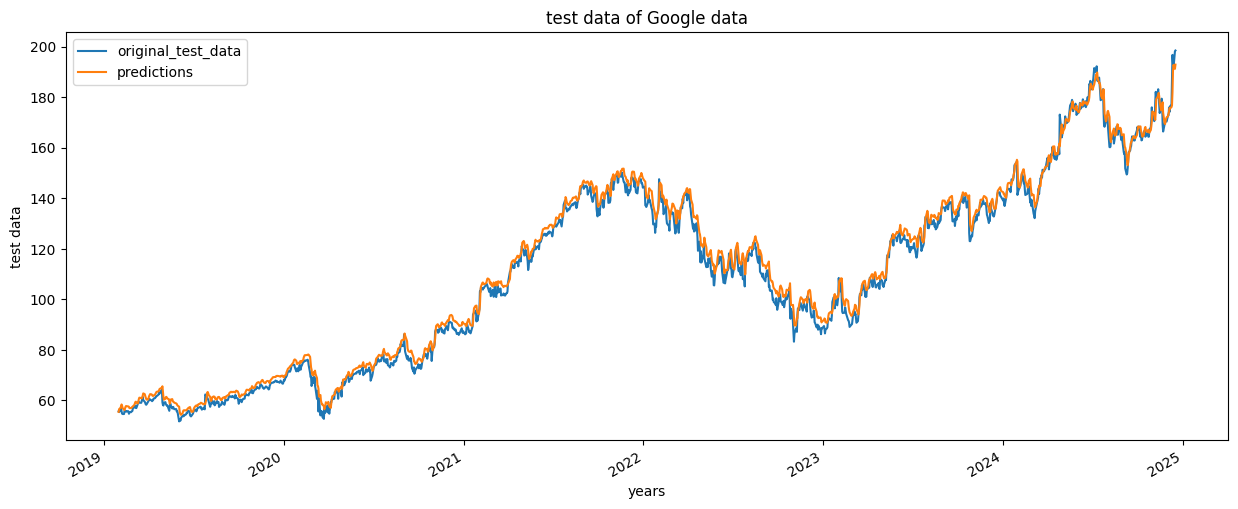

In [104]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

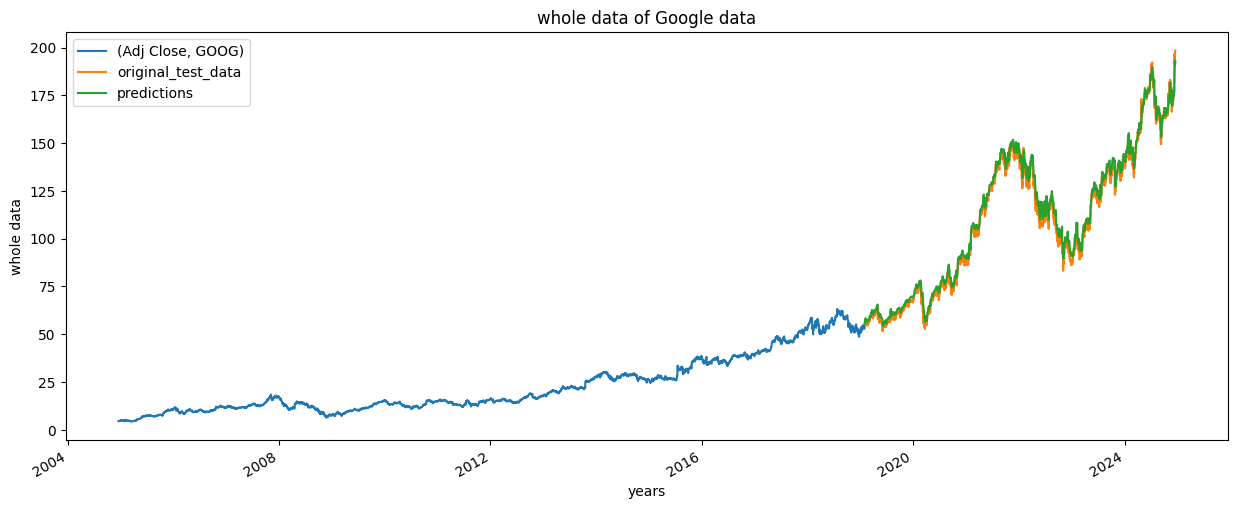

In [105]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [106]:
model.save("Latest_stock_price_model_byERIC.keras")